In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [46]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [47]:
habitat_df = pd.read_csv('./data/tabular_data/moco_adu.csv')

In [48]:
habitat_df.dtypes

Unnamed: 0                        int64
GEOID                             int64
TOTAL                             int64
MONTH_HC                          int64
SCD_TOT                           int64
SCD                               int64
AD_TOT                            int64
AMB_D                             int64
ILD_TOT                           int64
ILD                               int64
ES_TOT                            int64
ES_EMP                            int64
ES_UNEMP                          int64
ES_NLF                            int64
OS_TOT                            int64
OS_OCC                            int64
OS_VAC                            int64
VAC_TOT                           int64
VAC_FOR_RENT                      int64
VAC_RENTED                        int64
VAC_FOR_SALE                      int64
VAC_SOLD_NO                       int64
VAC_SEASONAL_USE                  int64
VAC_MIGRANT                       int64
VAC_OTHER_VAC                     int64


In [49]:
habitat_df.head()

,Unnamed: 0,GEOID,TOTAL,MONTH_HC,SCD_TOT,SCD,AD_TOT,AMB_D,ILD_TOT,ILD,ES_TOT,ES_EMP,ES_UNEMP,ES_NLF,OS_TOT,OS_OCC,OS_VAC,VAC_TOT,VAC_FOR_RENT,VAC_RENTED,VAC_FOR_SALE,VAC_SOLD_NO,VAC_SEASONAL_USE,VAC_MIGRANT,VAC_OTHER_VAC,RA_TOT,RA_SUB_100,RA_100_149,RA_150_199,RA_200_249,RA_250_299,RA_300_349,RA_350_399,RA_400_449,RA_450_499,RA_500_549,RA_550_599,RA_600_649,RA_650_699,RA_700_749,RA_750_799,RA_800_899,RA_900_999,RA_1000._1249,RA_1250_1.499,RA_1500._1999,RA_2000_2499,RA_2500_2999,RA_3000_3499,R_3500_OVER,TEN_TOT,TEN_OWNER,TEN_RENTER,RELOC_TOT,RELOC_COUNTY,RELOC_COUNTY_1_4,RELOC_COUNTY_5_17,RELOC_COUNTY_18_19,RELOC_COUNTY_20_24,RELOC_COUNTY_25_29,RELOC_COUNTY_30_34,RELOC_COUNTY_35_39,RELOC_COUNTY_40_44,RELOC_COUNTY_45_49,RELOC_COUNTY_50_54,RELOC_COUNTY_55_59,RELOC_COUNTY_60_64,RELOC_COUNTY_65_69,RELOC_COUNTY_70_74,RELOC_COUNTY_75_OVER,RELOC_POV_TOT,RELOC_PL_SUB_100,RELOC_PL_100_149,RELOC_PL_150_OVER,VS_TOT,VS_TOT_VET,VS_VET_18_34,VS_VET_35_54,VS_VET_55_64,VS_VET_65_74,VS_VET_75,SERV_DIS_TOT,SERV_DIS_EXISTING,HT_TOT,HT_FAM,HT_FAM_MAR,HT_FAM_MHH,HT_FAM_FHH,HT_LIVING_ALONE,LES_TOT,LES,LIV_ARR_TOT,LIV_ARR_ALONE_18_34,LIV_ARR_DEP_18_34,LIV_ARR_NONRELATIVES_18_34,LIV_ARR_ALONE_35_64,LIV_ARR_DEP_35_64,LIV_ARR_NONRELATIVES_35_64,LIV_ARR_ALONE_65_OVER,LIV_ARR_DEP_65_OVER,LIV_ARR_NONRELATIVES_65_OVER,VEH_TOT,VEH_1HH_TOT,VEH_1HH_NONE,VEH_1HH_1VEH,VEH_1HH_2VEH,VEH_1HH_3VEH,VEH_1HH_4VEH,VEH_2HH_TOT,VEH_2HH_NONE,VEH_2HH_1VEH,VEH_2HH_2VEH,VEH_2HH_3VEH,VEH_2HH_4VEH,VEH_3HH_TOT,VEH_3HH_NONE,VEH_3HH_1VEH,VEH_3HH_2VEH,VEH_3HH_3VEH,VEH_3HH_4VEH,VEH_4HH_TOT,VEH_4HH_NONE,VEH_4HH_1VEH,VEH_4HH_2VEH,VEH_4HH_3VEH,VEH_4HH_4VEH,CMMT_TOT,CMMT_SUB_5,CMMT_5_9,CMMT_10_14,CMMT_15_19,CMMT_20_24,CMMT_25_29,CMMT_30_34,CMMT_35_39,CMMT_40_44,CMMT_45_59,CMMT_60_89,CMMT_90_OVER,TRANS_TOT,TRANS_SOV,TRANS_PUB,TRANS_BIKE,TRANS_WALK,PLW_TOT,PLW_RES_STATE,PLW_RES_COUNTY,PLW_NONRES_COUNTY,PLW_NONRES_STATE,OCCUPATION_TOT,OCCUPATION_PRO,OCCUPATION_SERV,GEN_TOT,GEN_MILL,GEN_SEN,HHF_TOT,HHF_GAS,HHF_TANK_GAS,HHF_ELEC,HHF_KERO,HHF_COAL,HHF_WOOD,HHF_SOLAR,HHF_OTHER,HHF_NONE,HHF_GAS_TOT,HHF_GAS_PERC,HHF_ELEC_PERC,HHF_KERO_PERC,HHF_SOLAR_PERC,HHF_OTHER_PERC,HIC_TOT,HIC_EMPL,HIC_DIR_PURC,HIC_MEDICARE,HIC_MEDICAID,HIC_TRICARE,HIC_VA_CARE,HIC_PRIM_SEC,HIC_NONE,PRICE_TOT,PRICE_SUB_10000,PRICE_10000_14999,PRICE_15000_19999,PRICE_20000_24999,PRICE_25000_29999,PRICE_30000_34999,PRICE_35000_39999,PRICE_40000_49999,PRICE_50000_59999,PRICE_60000_69999,PRICE_70000_79999,PRICE_80000_89999,PRICE_90000_99999,PRICE_100000_124999,PRICE_125000_149999,PRICE_150000_174999,PRICE_175000_199999,PRICE_200000_249999,PRICE_250000_299999,PRICE_300000_399999,PRICE_400000_499999,PRICE_500000_749999,PRICE_750000_999999,PRICE_1000000_1499999,PRICE_1500000_1999999,PRICE_2000000_OVER,MED_HH_INCOME,INCOME_TOT,INCOME_SUB_10000,INCOME_10000_14999,INCOME_15000_19999,INCOME_20000_24999,INCOME_25000_29999,INCOME_30000_34999,INCOME_35000_39999,INCOME_40000_44999,INCOME_45000_49999,INCOME_50000_59999,INCOME_60000_74999,INCOME_75000_99999,INCOME_100000_124999,INCOME_125000_149999,INCOME_150000_199999,INCOME_200000_OVER,PS_TOT,PS_POV,PS_POV_PERC,TCOST_IDX,HAZ_IDX,JPI_IDX
0,1,24031700101,4495,2799,4286,26,4286,176,3294,93,3448,2407,82,917,1444,1370,74,74,0,0,0,26,10,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1370,1278,92,4468,196,15,22,0,2,0,43,47,0,10,48,9,0,0,0,0,4468,0,10,186,3294,242,2,35,58,76,71,242,18,1370,1226,1127,26,73,124,4328,27,3336,0,410,20,72,53,72,52,0,0,1370,124,0,84,40,0,0,492,0,30,254,181,27,226,0,0,93,102,31,528,0,60,207,152,109,2165,21,64,108,173,433,188,349,62,133,292,253,89,2373,1861,77,0,2,2373,2061,1816,245,312,2373,1424,314,4495,448,1035,1370,386,77,528,335,0,19,17,27,0,463,33.80,38.54,24.45,1.24,1.97,4453,2900,309,73,234,50,2,193,150,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,157230,1370,11,8,26,10,12,19,29,0,17,37,38,110,140,178,264,471,1226,45,3.67,70,55.0,51
1,2,24031700103,5447,2428,5196,133,5196,285,4347,170,4609,2849,112,1632,1874,1780,94,94,0,0,51,0,0,0,43,0,0,0,0,0,0

In [50]:
percent_employed = habitat_df['ES_EMP'] / habitat_df['TOTAL']
percent_employed

0      0.535484
1      0.523040
2      0.490492
3      0.544021
4      0.503128
5      0.531495
6      0.545661
7      0.546430
8      0.546968
9      0.534810
10     0.563441
11     0.574788
12     0.516340
13     0.577886
14     0.525052
15     0.452851
16     0.543969
17     0.527238
18     0.537102
19     0.546856
20     0.524861
21     0.483264
22     0.516910
23     0.495734
24     0.532782
25     0.562452
26     0.573346
27     0.542056
28     0.484709
29     0.538859
30     0.565310
31     0.582989
32     0.560517
33     0.530124
34     0.503576
35     0.539927
36     0.561417
37     0.528096
38     0.512457
39     0.597445
40     0.530485
41     0.283784
42     0.496430
43     0.505807
44     0.566761
45     0.534183
46     0.507839
47     0.498847
48     0.577084
49     0.591231
50     0.558235
51     0.596515
52     0.546279
53     0.539421
54     0.532113
55     0.515932
56     0.591205
57     0.554789
58     0.541159
59     0.586134
60     0.494937
61     0.509868
62     0

In [51]:
#perentage mean of self care disabilities
pct_scdiff = (habitat_df['SCD'] / habitat_df['TOTAL']) * 100
pct_scdiff.mean()

1.6755651597345895

In [52]:
#perentage mean of self care disabilities

pct_scdiff = (habitat_df['SCD'] / habitat_df['TOTAL']) * 100
pct_scdiff.mean()

1.6755651597345895

In [53]:
#perentage of ambulatory disabilities


pct_amddiff = (habitat_df['AMB_D'] / habitat_df['TOTAL']) * 100
pct_amddiff.mean()

3.9018299805493313

In [54]:
#perentage of independent living disabilities

pct_ilddiff = (habitat_df['ILD'] / habitat_df['TOTAL']) * 100
pct_ilddiff.mean()

3.0073862321040736

In [55]:
#view of the dataframe

habitat_df

,Unnamed: 0,GEOID,TOTAL,MONTH_HC,SCD_TOT,SCD,AD_TOT,AMB_D,ILD_TOT,ILD,ES_TOT,ES_EMP,ES_UNEMP,ES_NLF,OS_TOT,OS_OCC,OS_VAC,VAC_TOT,VAC_FOR_RENT,VAC_RENTED,VAC_FOR_SALE,VAC_SOLD_NO,VAC_SEASONAL_USE,VAC_MIGRANT,VAC_OTHER_VAC,RA_TOT,RA_SUB_100,RA_100_149,RA_150_199,RA_200_249,RA_250_299,RA_300_349,RA_350_399,RA_400_449,RA_450_499,RA_500_549,RA_550_599,RA_600_649,RA_650_699,RA_700_749,RA_750_799,RA_800_899,RA_900_999,RA_1000._1249,RA_1250_1.499,RA_1500._1999,RA_2000_2499,RA_2500_2999,RA_3000_3499,R_3500_OVER,TEN_TOT,TEN_OWNER,TEN_RENTER,RELOC_TOT,RELOC_COUNTY,RELOC_COUNTY_1_4,RELOC_COUNTY_5_17,RELOC_COUNTY_18_19,RELOC_COUNTY_20_24,RELOC_COUNTY_25_29,RELOC_COUNTY_30_34,RELOC_COUNTY_35_39,RELOC_COUNTY_40_44,RELOC_COUNTY_45_49,RELOC_COUNTY_50_54,RELOC_COUNTY_55_59,RELOC_COUNTY_60_64,RELOC_COUNTY_65_69,RELOC_COUNTY_70_74,RELOC_COUNTY_75_OVER,RELOC_POV_TOT,RELOC_PL_SUB_100,RELOC_PL_100_149,RELOC_PL_150_OVER,VS_TOT,VS_TOT_VET,VS_VET_18_34,VS_VET_35_54,VS_VET_55_64,VS_VET_65_74,VS_VET_75,SERV_DIS_TOT,SERV_DIS_EXISTING,HT_TOT,HT_FAM,HT_FAM_MAR,HT_FAM_MHH,HT_FAM_FHH,HT_LIVING_ALONE,LES_TOT,LES,LIV_ARR_TOT,LIV_ARR_ALONE_18_34,LIV_ARR_DEP_18_34,LIV_ARR_NONRELATIVES_18_34,LIV_ARR_ALONE_35_64,LIV_ARR_DEP_35_64,LIV_ARR_NONRELATIVES_35_64,LIV_ARR_ALONE_65_OVER,LIV_ARR_DEP_65_OVER,LIV_ARR_NONRELATIVES_65_OVER,VEH_TOT,VEH_1HH_TOT,VEH_1HH_NONE,VEH_1HH_1VEH,VEH_1HH_2VEH,VEH_1HH_3VEH,VEH_1HH_4VEH,VEH_2HH_TOT,VEH_2HH_NONE,VEH_2HH_1VEH,VEH_2HH_2VEH,VEH_2HH_3VEH,VEH_2HH_4VEH,VEH_3HH_TOT,VEH_3HH_NONE,VEH_3HH_1VEH,VEH_3HH_2VEH,VEH_3HH_3VEH,VEH_3HH_4VEH,VEH_4HH_TOT,VEH_4HH_NONE,VEH_4HH_1VEH,VEH_4HH_2VEH,VEH_4HH_3VEH,VEH_4HH_4VEH,CMMT_TOT,CMMT_SUB_5,CMMT_5_9,CMMT_10_14,CMMT_15_19,CMMT_20_24,CMMT_25_29,CMMT_30_34,CMMT_35_39,CMMT_40_44,CMMT_45_59,CMMT_60_89,CMMT_90_OVER,TRANS_TOT,TRANS_SOV,TRANS_PUB,TRANS_BIKE,TRANS_WALK,PLW_TOT,PLW_RES_STATE,PLW_RES_COUNTY,PLW_NONRES_COUNTY,PLW_NONRES_STATE,OCCUPATION_TOT,OCCUPATION_PRO,OCCUPATION_SERV,GEN_TOT,GEN_MILL,GEN_SEN,HHF_TOT,HHF_GAS,HHF_TANK_GAS,HHF_ELEC,HHF_KERO,HHF_COAL,HHF_WOOD,HHF_SOLAR,HHF_OTHER,HHF_NONE,HHF_GAS_TOT,HHF_GAS_PERC,HHF_ELEC_PERC,HHF_KERO_PERC,HHF_SOLAR_PERC,HHF_OTHER_PERC,HIC_TOT,HIC_EMPL,HIC_DIR_PURC,HIC_MEDICARE,HIC_MEDICAID,HIC_TRICARE,HIC_VA_CARE,HIC_PRIM_SEC,HIC_NONE,PRICE_TOT,PRICE_SUB_10000,PRICE_10000_14999,PRICE_15000_19999,PRICE_20000_24999,PRICE_25000_29999,PRICE_30000_34999,PRICE_35000_39999,PRICE_40000_49999,PRICE_50000_59999,PRICE_60000_69999,PRICE_70000_79999,PRICE_80000_89999,PRICE_90000_99999,PRICE_100000_124999,PRICE_125000_149999,PRICE_150000_174999,PRICE_175000_199999,PRICE_200000_249999,PRICE_250000_299999,PRICE_300000_399999,PRICE_400000_499999,PRICE_500000_749999,PRICE_750000_999999,PRICE_1000000_1499999,PRICE_1500000_1999999,PRICE_2000000_OVER,MED_HH_INCOME,INCOME_TOT,INCOME_SUB_10000,INCOME_10000_14999,INCOME_15000_19999,INCOME_20000_24999,INCOME_25000_29999,INCOME_30000_34999,INCOME_35000_39999,INCOME_40000_44999,INCOME_45000_49999,INCOME_50000_59999,INCOME_60000_74999,INCOME_75000_99999,INCOME_100000_124999,INCOME_125000_149999,INCOME_150000_199999,INCOME_200000_OVER,PS_TOT,PS_POV,PS_POV_PERC,TCOST_IDX,HAZ_IDX,JPI_IDX
0,1,24031700101,4495,2799,4286,26,4286,176,3294,93,3448,2407,82,917,1444,1370,74,74,0,0,0,26,10,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1370,1278,92,4468,196,15,22,0,2,0,43,47,0,10,48,9,0,0,0,0,4468,0,10,186,3294,242,2,35,58,76,71,242,18,1370,1226,1127,26,73,124,4328,27,3336,0,410,20,72,53,72,52,0,0,1370,124,0,84,40,0,0,492,0,30,254,181,27,226,0,0,93,102,31,528,0,60,207,152,109,2165,21,64,108,173,433,188,349,62,133,292,253,89,2373,1861,77,0,2,2373,2061,1816,245,312,2373,1424,314,4495,448,1035,1370,386,77,528,335,0,19,17,27,0,463,33.80,38.54,24.45,1.24,1.97,4453,2900,309,73,234,50,2,193,150,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,157230,1370,11,8,26,10,12,19,29,0,17,37,38,110,140,178,264,471,1226,45,3.67,70,55.0,51
1,2,24031700103,5447,2428,5196,133,5196,285,4347,170,4609,2849,112,1632,1874,1780,94,94,0,0,51,0,0,0,43,0,0,0,0,0,0

In [56]:
#the highest percentages self care disabilities

mean_scd = pct_scdiff[pct_scdiff > 3.78].sort_values(ascending=False)

In [57]:
habitat_df.shape

(215, 231)

In [58]:
habitat_df.describe()

,Unnamed: 0,GEOID,TOTAL,MONTH_HC,SCD_TOT,SCD,AD_TOT,AMB_D,ILD_TOT,ILD,ES_TOT,ES_EMP,ES_UNEMP,ES_NLF,OS_TOT,OS_OCC,OS_VAC,VAC_TOT,VAC_FOR_RENT,VAC_RENTED,VAC_FOR_SALE,VAC_SOLD_NO,VAC_SEASONAL_USE,VAC_MIGRANT,VAC_OTHER_VAC,RA_TOT,RA_SUB_100,RA_100_149,RA_150_199,RA_200_249,RA_250_299,RA_300_349,RA_350_399,RA_400_449,RA_450_499,RA_500_549,RA_550_599,RA_600_649,RA_650_699,RA_700_749,RA_750_799,RA_800_899,RA_900_999,RA_1000._1249,RA_1250_1.499,RA_1500._1999,RA_2000_2499,RA_2500_2999,RA_3000_3499,R_3500_OVER,TEN_TOT,TEN_OWNER,TEN_RENTER,RELOC_TOT,RELOC_COUNTY,RELOC_COUNTY_1_4,RELOC_COUNTY_5_17,RELOC_COUNTY_18_19,RELOC_COUNTY_20_24,RELOC_COUNTY_25_29,RELOC_COUNTY_30_34,RELOC_COUNTY_35_39,RELOC_COUNTY_40_44,RELOC_COUNTY_45_49,RELOC_COUNTY_50_54,RELOC_COUNTY_55_59,RELOC_COUNTY_60_64,RELOC_COUNTY_65_69,RELOC_COUNTY_70_74,RELOC_COUNTY_75_OVER,RELOC_POV_TOT,RELOC_PL_SUB_100,RELOC_PL_100_149,RELOC_PL_150_OVER,VS_TOT,VS_TOT_VET,VS_VET_18_34,VS_VET_35_54,VS_VET_55_64,VS_VET_65_74,VS_VET_75,SERV_DIS_TOT,SERV_DIS_EXISTING,HT_TOT,HT_FAM,HT_FAM_MAR,HT_FAM_MHH,HT_FAM_FHH,HT_LIVING_ALONE,LES_TOT,LES,LIV_ARR_TOT,LIV_ARR_ALONE_18_34,LIV_ARR_DEP_18_34,LIV_ARR_NONRELATIVES_18_34,LIV_ARR_ALONE_35_64,LIV_ARR_DEP_35_64,LIV_ARR_NONRELATIVES_35_64,LIV_ARR_ALONE_65_OVER,LIV_ARR_DEP_65_OVER,LIV_ARR_NONRELATIVES_65_OVER,VEH_TOT,VEH_1HH_TOT,VEH_1HH_NONE,VEH_1HH_1VEH,VEH_1HH_2VEH,VEH_1HH_3VEH,VEH_1HH_4VEH,VEH_2HH_TOT,VEH_2HH_NONE,VEH_2HH_1VEH,VEH_2HH_2VEH,VEH_2HH_3VEH,VEH_2HH_4VEH,VEH_3HH_TOT,VEH_3HH_NONE,VEH_3HH_1VEH,VEH_3HH_2VEH,VEH_3HH_3VEH,VEH_3HH_4VEH,VEH_4HH_TOT,VEH_4HH_NONE,VEH_4HH_1VEH,VEH_4HH_2VEH,VEH_4HH_3VEH,VEH_4HH_4VEH,CMMT_TOT,CMMT_SUB_5,CMMT_5_9,CMMT_10_14,CMMT_15_19,CMMT_20_24,CMMT_25_29,CMMT_30_34,CMMT_35_39,CMMT_40_44,CMMT_45_59,CMMT_60_89,CMMT_90_OVER,TRANS_TOT,TRANS_SOV,TRANS_PUB,TRANS_BIKE,TRANS_WALK,PLW_TOT,PLW_RES_STATE,PLW_RES_COUNTY,PLW_NONRES_COUNTY,PLW_NONRES_STATE,OCCUPATION_TOT,OCCUPATION_PRO,OCCUPATION_SERV,GEN_TOT,GEN_MILL,GEN_SEN,HHF_TOT,HHF_GAS,HHF_TANK_GAS,HHF_ELEC,HHF_KERO,HHF_COAL,HHF_WOOD,HHF_SOLAR,HHF_OTHER,HHF_NONE,HHF_GAS_TOT,HHF_GAS_PERC,HHF_ELEC_PERC,HHF_KERO_PERC,HHF_SOLAR_PERC,HHF_OTHER_PERC,HIC_TOT,HIC_EMPL,HIC_DIR_PURC,HIC_MEDICARE,HIC_MEDICAID,HIC_TRICARE,HIC_VA_CARE,HIC_PRIM_SEC,HIC_NONE,PRICE_TOT,PRICE_SUB_10000,PRICE_10000_14999,PRICE_15000_19999,PRICE_20000_24999,PRICE_25000_29999,PRICE_30000_34999,PRICE_35000_39999,PRICE_40000_49999,PRICE_50000_59999,PRICE_60000_69999,PRICE_70000_79999,PRICE_80000_89999,PRICE_90000_99999,PRICE_100000_124999,PRICE_125000_149999,PRICE_150000_174999,PRICE_175000_199999,PRICE_200000_249999,PRICE_250000_299999,PRICE_300000_399999,PRICE_400000_499999,PRICE_500000_749999,PRICE_750000_999999,PRICE_1000000_1499999,PRICE_1500000_1999999,PRICE_2000000_OVER,MED_HH_INCOME,INCOME_TOT,INCOME_SUB_10000,INCOME_10000_14999,INCOME_15000_19999,INCOME_20000_24999,INCOME_25000_29999,INCOME_30000_34999,INCOME_35000_39999,INCOME_40000_44999,INCOME_45000_49999,INCOME_50000_59999,INCOME_60000_74999,INCOME_75000_99999,INCOME_100000_124999,INCOME_125000_149999,INCOME_150000_199999,INCOME_200000_OVER,PS_TOT,PS_POV,PS_POV_PERC,TCOST_IDX,HAZ_IDX,JPI_IDX
count,215.000000,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.0,215.0,215.0,215.000000,215.0,215.000000,215.0,215.000000,215.000000,215.000000,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,2

In [59]:
habitat_df['OS_TOT'].describe()

count     215.000000
mean     1792.953488
std       653.397889
min       573.000000
25%      1297.000000
50%      1780.000000
75%      2235.500000
max      4801.000000
Name: OS_TOT, dtype: float64

In [60]:
#counts of housing units by type of occupancy status

habitat_df['OS_TOT'].value_counts()

1986    3
1690    2
1250    2
1835    2
1444    2
2118    2
1829    2
1108    2
1793    2
1292    2
1671    2
2165    2
1168    1
1160    1
2229    1
686     1
2182    1
1626    1
2730    1
1159    1
2215    1
1198    1
1701    1
2207    1
694     1
1179    1
1083    1
2199    1
2673    1
704     1
2747    1
1667    1
2289    1
2301    1
711     1
891     1
1256    1
1767    1
1760    1
2271    1
1755    1
3283    1
1351    1
1750    1
2773    1
1236    1
2734    1
1226    1
2760    1
1325    1
2244    1
2469    1
4801    1
1668    1
1143    1
2687    1
2172    1
1582    1
1632    1
2090    1
1064    1
2599    1
1062    1
1573    1
2084    1
1058    1
2509    1
1562    1
1048    1
2071    1
1044    1
2575    1
1550    1
2534    1
2571    1
1031    1
1540    1
1539    1
1071    1
1074    1
1076    1
1111    1
1147    1
1780    1
1920    1
1135    1
2679    1
1132    1
2144    1
2430    1
2138    1
2131    1
1077    1
2639    1
1614    1
1605    1
3651    1
1523    1
1103    1
573     1


In [61]:
## Are ADU's an appropriate solution for people with disabilities in MoCo?
#Look at the data from this perspective!!!

In [62]:
habitat_df.isnull().sum()

Unnamed: 0                       0
GEOID                            0
TOTAL                            0
MONTH_HC                         0
SCD_TOT                          0
SCD                              0
AD_TOT                           0
AMB_D                            0
ILD_TOT                          0
ILD                              0
ES_TOT                           0
ES_EMP                           0
ES_UNEMP                         0
ES_NLF                           0
OS_TOT                           0
OS_OCC                           0
OS_VAC                           0
VAC_TOT                          0
VAC_FOR_RENT                     0
VAC_RENTED                       0
VAC_FOR_SALE                     0
VAC_SOLD_NO                      0
VAC_SEASONAL_USE                 0
VAC_MIGRANT                      0
VAC_OTHER_VAC                    0
RA_TOT                           0
RA_SUB_100                       0
RA_100_149                       0
RA_150_199          

In [63]:
habitat_df['SCD'].sum()

16239

In [64]:
# features = ['INCOME_200000_OVER','INCOME_75000_99999','INCOME_100000_124999',
#             'INCOME_125000_149999','INCOME_150000_199999','PRICE_10000_14999',              
#             'PRICE_15000_19999','PRICE_20000_24999','PRICE_25000_29999','PRICE_30000_34999',
#             'PRICE_35000_39999','PRICE_40000_49999','PRICE_50000_59999','PRICE_60000_69999',            
#             'PRICE_70000_79999','PRICE_80000_89999','PRICE_90000_99999','PRICE_100000_124999',
#             'PRICE_125000_149999','PRICE_150000_174999','PRICE_175000_199999','PRICE_200000_249999',
#             'PRICE_250000_299999','PRICE_300000_399999','PRICE_400000_499999','PRICE_500000_749999',               
#             'PRICE_750000_999999','PRICE_1000000_1499999','PRICE_1500000_1999999','PRICE_2000000_OVER',
#             'MED_HH_INCOME','INCOME_TOT','INCOME_SUB_10000','INCOME_10000_14999','INCOME_15000_19999',                
#             'INCOME_20000_24999','INCOME_25000_29999','INCOME_30000_34999','INCOME_35000_39999','INCOME_45000_49999']

In [65]:
#sum of the disabilities

dis = (habitat_df['AMB_D'] + habitat_df['SCD'] + habitat_df['ILD']).sum()
dis

83916

In [66]:
all_dis = habitat_df['AMB_D'] 
all_dis.sum()

38113

In [67]:
(all_dis/habitat_df['TOTAL']).sum()

8.38893445818106

In [68]:
habitat_df['AMB_D'].sum()

38113

In [69]:
habitat_df['OS_VAC'].sum()

17721

In [70]:
habitat_df['VAC_TOT'].value_counts()

0      12
34      7
66      4
38      4
31      4
123     3
44      3
104     3
51      3
37      3
19      3
80      3
75      3
15      3
14      3
70      3
67      3
60      3
61      3
96      3
39      2
95      2
110     2
48      2
52      2
91      2
89      2
88      2
87      2
79      2
54      2
77      2
56      2
73      2
71      2
62      2
111     2
113     2
27      2
224     2
178     2
17      2
173     2
155     2
153     2
147     2
25      2
21      2
63      2
35      2
30      2
32      2
33      1
261     1
6       1
121     1
59      1
58      1
264     1
9       1
57      1
11      1
13      1
28      1
55      1
26      1
18      1
53      1
36      1
41      1
42      1
23      1
29      1
301     1
50      1
49      1
16      1
250     1
64      1
122     1
388     1
135     1
138     1
142     1
143     1
144     1
149     1
159     1
162     1
170     1
175     1
176     1
182     1
183     1
184     1
185     1
186     1
205     1
211     1
232     1


In [71]:
vac_types = habitat_df[['VAC_FOR_RENT', 'VAC_RENTED', 'VAC_FOR_SALE', 'VAC_SOLD_NO', 
          'VAC_SEASONAL_USE', 'VAC_MIGRANT', 'VAC_OTHER_VAC', 'OS_VAC']]

In [72]:
vac_types.shape

(215, 8)

In [73]:
vac_types.describe().T

,count,mean,std,min,25%,50%,75%,max
VAC_FOR_RENT,215.0,23.874419,39.927833,0.0,0.0,0.0,38.5,305.0
VAC_RENTED,215.0,5.074419,13.532379,0.0,0.0,0.0,0.0,82.0
VAC_FOR_SALE,215.0,12.479070,23.774609,0.0,0.0,0.0,19.5,142.0
VAC_SOLD_NO,215.0,4.227907,11.771944,0.0,0.0,0.0,0.0,76.0
VAC_SEASONAL_USE,215.0,7.218605,15.587667,0.0,0.0,0.0,8.0,93.0
VAC_MIGRANT,215.0,0.218605,3.205373,0.0,0.0,0.0,0.0,47.0
VAC_OTHER_VAC,215.0,29.330233,30.792155,0.0,0.0,23.0,45.0,168.0
OS_VAC,215.0,82.423256,66.708968,0.0,34.0,67.0,110.0,388.0


In [74]:
habitat_df['VAC_RENTED'].tail()

210     0
211     0
212     0
213    29
214     0
Name: VAC_RENTED, dtype: int64

In [75]:
import seaborn as sns

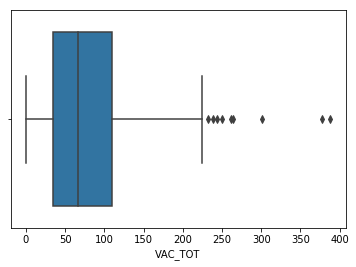

In [76]:
sns.boxplot(habitat_df['VAC_TOT'])


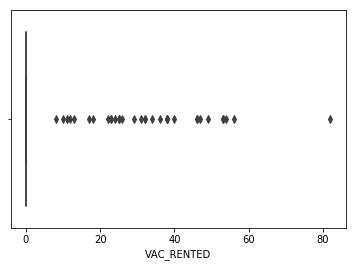

In [77]:
sns.boxplot(habitat_df['VAC_RENTED'])

In [78]:
!pip install plotly

In [79]:
import plotly.plotly as py
import plotly.figure_factory as ff
import scipy as sp
import plotly.graph_objs as go

In [80]:
# table = ff.create_table(vac_types)
# py.iplot(table, filename='jupyter-table1')

In [81]:
habitat_df['TOTAL'].sum()

1026371

In [82]:
habitat_df['ILD'].sum()

29564

In [83]:
#number of people living alone over 65

one = habitat_df['LIV_ARR_ALONE_65_OVER'].sum()

In [84]:
two = habitat_df['LIV_ARR_ALONE_35_64'].sum()

In [85]:
habitat_df['VEH_1HH_TOT'].sum()

91530

In [86]:
habitat_df['PS_POV'].sum()

11925

In [87]:
habitat_df['VEH_1HH_1VEH'].sum()

64804

In [88]:
habitat_df['PS_POV'].sum()

11925